In [59]:
import numpy as np
import os
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import feature
from scipy import spatial
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from time import time
from numpy import dot
from numpy.linalg import norm
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.spatial import distance 
# Ho 10 personaggi famosi, ognuno con un diverso numero di immagini, per un totale di 2174 immagini.
# Lo scopo è: data un'immagine, classificare le 10 immagini più simili alla precedente, in ordine
# di similarità.
# Importo il file con le LBP features, tenendo conto che i primi due valori sono int32 ed indicano
# rispettivamente il numero di facce presenti nella cartella e le LBP features per ogni faccia.
arr = np.fromfile("./thumbnails_features_deduped_sample/bill gates/feature.bin", dtype = np.int32)
arr[0:60]
# Nel caso di Bill Gates, sono presenti 288 immagini, ognuna con 3717 features LBP.

array([      288,      3717,         0,         0,         0,         0,
               0,         0,     65536,         0,         0,   4456448,
       503318272,        10,         1,  33554433,       256,       768,
               0,         0, 117441024,  19464192,         0,         0,
               0,         0,      9728,  84541440,  33554432,         0,
          655616,       256,         9,         0,         0,     65536,
           22528,         0,         0,         0,         0,        21,
           65536,         0,         0,         0,  50331649,     65537,
          131072,  67108864,      1280,       541,         0,         0,
               0, 805306368,    786432,       768,         0,         0])

In [2]:
3717*288
# Dunque, in teoria dovrebbero esserci 1070496 elementi (3717 features * 288 facce)

1070496

In [14]:
len(arr)
# Tuttavia ce ne sono solo 267626 (circa 260mila anzichè un milione). Questo perchè solo i primi due numeri
# sono int32, mentre gli altri no.

267626

In [15]:
arr = np.fromfile("./thumbnails_features_deduped_sample/bill gates/feature.bin", dtype = np.int8)
len(arr)
# Se codifico il file binario in 8 bit anzichè 32 bit noto che ora le dimensioni tornano.
# Devo però rimuovere i primi elementi perchè corrispondono ai due interi relativi appunto
# al numero di facce e al numero di features.

1070504

In [18]:
arr = arr[8:]
len(arr)
# Ora il numero di elementi è esatto e corrisponde solo ed esclusivamente alle features per faccia.

1070496

In [2]:
def load_data():
    base_path = './thumbnails_features_deduped_sample/'

    labels = []
    features = []
    final_features = []
    dimensions = 0

    for di,d in enumerate(sorted(os.listdir(base_path))):
        features = []
        print(d)
        # Salvo il numero di facce e il numero di features per faccia nella variabile dim
        dim = np.fromfile(base_path+d+'/feature.bin', dtype=np.int32)[0:2] 
        # Salvo tutte le features (un personaggio alla volta) nella variabile feats
        feats = np.fromfile(base_path+d+'/feature.bin', dtype=np.int8)[8:]
        # Ora con un ciclo, salvo in cur_features le features dell'immagine corrente
        
        for i in np.arange(0,dim[0]*dim[1], step = dim[1]):
            
            cur_features = feats[i:i+dim[1]]
            features = np.append(features,[cur_features])
        
            # Quindi poi aggiungo le features e la label di quell'immagine
        
        labels = np.append(labels,np.full(dim[0],d))
        features = features.reshape(dim[0],dim[1])
        
        final_features = np.append(final_features,features)
        dimensions = dimensions+dim[0]
        final_features = np.reshape(final_features,(dimensions,dim[1]))
        print([features.shape,final_features.shape])
        

    # Separazione training / test set
    
    X_train, X_test, y_train, y_test = train_test_split(final_features, labels, test_size=0.5, shuffle=True, random_state=1)
    # X: features, y: labels

    return X_train, X_test, y_train, y_test

In [3]:
# Provo ad eseguirlo
prova = load_data()

aaron carter
[(48, 3717), (48, 3717)]
adam brody
[(83, 3717), (131, 3717)]
adrien brody
[(76, 3717), (207, 3717)]
aishwarya rai
[(781, 3717), (988, 3717)]
al gore
[(175, 3717), (1163, 3717)]
bill gates
[(288, 3717), (1451, 3717)]
liv tyler
[(393, 3717), (1844, 3717)]
martina hingis
[(51, 3717), (1895, 3717)]
michelle obama
[(123, 3717), (2018, 3717)]
steve jobs
[(156, 3717), (2174, 3717)]


In [109]:
# Lo scopo però è quello
# LBP features normalizzate nello spazio L2
norm_0 = dati[0]/np.linalg.norm(dati[0]) 
norm_1 = dati[500]/np.linalg.norm(dati[500])

In [110]:
# Calcolo la distanza euclidea dei due vettori 
dist = np.linalg.norm(norm_0-norm_1)

In [111]:
# Converto la distanza in similarità tra 0 e 1 (0 molto diversi, 1 uguali)
1/(1+dist)

0.5152775427197981

In [6]:
# DA QUI IN POI FACCIO ALTRE ROBE












# Parametri da provare in cross validation
param_grid = {'C': [1, 2, 3, 4, 5, 10, 20, 50, 100, 500],
          'gamma': [1, 5, 10, 50, 100, 500, 600, 700, 800, 900, 1000], }

# Inizializzazione Support Vector Machine
clf = GridSearchCV(SVC(kernel='poly', class_weight='balanced'), param_grid, cv=2, n_jobs=-1)

# Addestramento
t2 = time()
clf = clf.fit(prova[0], prova[2])
print("Addestramento completato in %0.3fs" % (time() - t2))

# Risultato della cross validation
print("Migliore combinazione di parametri:")
print(" C: "+str(clf.best_estimator_.C))
print(" gamma: "+str(clf.best_estimator_.gamma))

Addestramento completato in 808.323s
Migliore combinazione di parametri:
 C: 1
 gamma: 1


In [7]:
# Test
y_pred = clf.predict(prova[1])

# Report di classificazione
print("Report di classificazione:")
print(classification_report(prova[3], y_pred))

Report di classificazione:
                precision    recall  f1-score   support

  aaron carter       0.94      0.68      0.79        22
    adam brody       0.95      0.49      0.65        43
  adrien brody       1.00      0.76      0.86        37
 aishwarya rai       0.89      0.94      0.92       400
       al gore       0.87      0.85      0.86        88
    bill gates       0.77      0.99      0.86       142
     liv tyler       0.82      0.89      0.85       190
martina hingis       0.78      0.30      0.44        23
michelle obama       1.00      0.64      0.78        76
    steve jobs       0.84      0.80      0.82        66

     micro avg       0.86      0.86      0.86      1087
     macro avg       0.89      0.74      0.78      1087
  weighted avg       0.87      0.86      0.85      1087



Matrice di confusione:
[[ 15   0   0   3   0   0   3   0   0   1]
 [  0  21   0   6   2   5   5   1   0   3]
 [  0   0  28   0   2   5   2   0   0   0]
 [  0   0   0 378   1   7  13   0   0   1]
 [  0   0   0   3  75   5   5   0   0   0]
 [  0   0   0   0   0 140   0   0   0   2]
 [  1   0   0  12   0   6 169   1   0   1]
 [  0   0   0   9   1   2   3   7   0   1]
 [  0   1   0  12   2   6   5   0  49   1]
 [  0   0   0   2   3   7   1   0   0  53]]


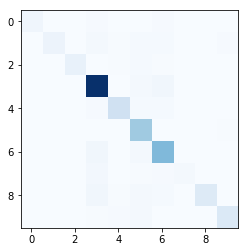

In [8]:
print("Matrice di confusione:")
cm = confusion_matrix(prova[3], y_pred)
print(cm)
plt.imshow(cm, cmap=plt.cm.Blues); plt.show()

In [9]:
# Calcolo accuracy partendo dalla matrice di confusione.
# Questa volta non è più una matrice 2x2, ma 10x10, essendo 10 le labels.
correct=0
for i in range(0,10):
    correct= correct+cm[i,i]
#correct
total = 1087

accuracy = correct/total
print("L'accuracy ottenuta è pari a " + str(accuracy*100) + " %") 

# Accuracy ottenuta: 86%

L'accuracy ottenuta è pari a 86.0165593376265 %
